# MIE 1624 Introduction to Data Science and Analytics

# Assignment 2

## 1 Data Cleaning

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statistics
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score,  classification_report, \
                            accuracy_score, f1_score
from sklearn.decomposition import PCA

In [2]:
# Read the clean_kaggle_data.csv
dataframe = pd.read_csv('Kaggle_Salary.csv')
pd.options.display.max_columns = None
dataframe

/Users/jia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,73,77,81,94,96,109,114,115,130,139,146,147,153,154,167,171,175,180,193,206,212,219,224,228,231,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite

### 1.1 Data Cleaning

In [3]:
# Drop the time column, remaining 247 columns
df1 = dataframe.drop(['Time from Start to Finish (seconds)'], axis=1)

**Columns include "OTHER_TEXT" and "TEXT" are not useful for our data analysis, since "OTHER_TEXT" columns indicate whether participants fill the other options or not. -1 means select the option that the survey provided, otherwise panticipants fill other answers by themselves. "TEXT" columns appear at "Q14_Part_TEXT", they are indicated the choice that participants choose in Q14.**

In [4]:
# Drop the "OTHER_TEXT" and "TEXT" columns, remain 219 columns
col_text = []
for col in df1.columns:
    if "TEXT" in col:
        col_text.append(col)
df2 = df1.drop(col_text, axis=1)

In [5]:
# Select 17 columns that not multiple choice questions
col_multi_choice = []
for col in df2.columns:
    if "Part" in col:
        col_multi_choice.append(col)
print('There are',len(col_multi_choice), 'columns for multiple choice questions.')
df3 = df2.drop(col_multi_choice, axis=1)

There are 202 columns for multiple choice questions.


In [6]:
# Count the Nulls among 17 columns
null_num_in17 = df3.isnull().sum()
print("Count number of Nulls for the reamining 17 columns", null_num_in17)

Count number of Nulls for the reamining 17 columns Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q10               0
Q11             247
Q14            1045
Q15            1075
Q19            1844
Q22            1947
Q23            1956
Q10_Encoded       1
Q10_buckets       1
dtype: int64


**Q11: Approximately how much money have you spent on machine learning?**

**Q14: What is the primary tool that you use at work or school to analyze data?**

**Q15: How long have you been writing code to analyze data?**

**Q19: What programming language would you recommend an aspiring data scientist to learn first?**

**Q22: Have you ever used a TPU (tensor processing unit)?**

**Q23: For how many years have you used machine learning methods?**

**The Null in Q10_Encoded and Q10_buckets are the first row where used to place questions, there is no need to fill up these two.**

**For other questions, the percantage of Null are not more than 20%, so I choose to fill them.**

In [7]:
# Drop the first question row
df4 = df2.drop(df2.index[[0]])

In [8]:
# Fillin Q11, Q14, Q15, Q19, Q22, Q23, remaining 219 features
for col in df4[['Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23']]:
    df4[col].fillna(df4[col].mode()[0], inplace=True)
check_null_num = df4[['Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23']].isnull().sum()
print("Check the Null number in Q11, Q14 ,Q15, Q19, Q22, Q23 after fill in", check_null_num)

Check the Null number in Q11, Q14 ,Q15, Q19, Q22, Q23 after fill in Q11    0
Q14    0
Q15    0
Q19    0
Q22    0
Q23    0
dtype: int64


**Drop the columns that contains "OTHER_TEXT" and "TEXT", also drop the first row that contain questions. Remaining 219 columns, 202 are corresponding to multiple choice questions.**

### 1.2 Data Encoding

### 1.2.1 Label Encoding

**Label Encoding is used to ordinal categorical. Q4 is about education level, it has order between each level, so I choose to use label encoding to Q4.**

In [9]:
# List options for education level
education_list = df4.Q4.unique()
print(education_list)

['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 'I prefer not to answer' 'No formal education past high school']


In [10]:
encode_education = {   
    'I prefer not to answer': 0,
    'No formal education past high school': 1,
    'Some college/university study without earning a bachelor’s degree': 2,
    'Professional degree': 3,
    'Bachelor’s degree': 4,
    'Master’s degree': 5,
    'Doctoral degree': 6,
    }
df4[['Q4']] = df4.Q4.map(encode_education)

### 1.2.2 One Hot Encoding

**For categorical variables where no ordinal relationship exists, the one hot encoding should be applied. Assume a natural ordering between categories may result in poor performance or unexpected results. So, among the 17 single questions, Q2, Q3, Q5, Q8, Q14, Q19, I choose to use one hot coding. In one hot encoding, for each categorical , I create a dummy variable to represent them. Each category is mapped with a binary variable containing either 0 or 1.**

In [11]:
# Implement one hot encode on six columns, result in 97 dummy columns and total columns become 310
dummy_col = ['Q2', 'Q3', 'Q5', 'Q8', 'Q14', 'Q19']  #dummy 97 columns
df5 = pd.concat([df4, pd.get_dummies(df4[dummy_col])], axis=1) # 316 columns
df6 = df5.drop(df5[dummy_col], axis=1) #310 columns
df6

,Q1,Q4,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,Q2_Female,Q2_Male,Q2_Prefer not to say,Q2_Prefer to self-describe,Q3_Algeria,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Saudi Arabia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q8_I do not know,Q8_No (we do not use ML methods),Q8_We are exploring ML methods (and may one day put a model into production),"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)",Q8_We use ML methods for generating insights (but do not put working models into production),"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP,

### 1.2.3 Encoding for Range Data

**For columns Q1, Q6, Q7, Q11, Q15, Q22, Q23, they record the data in a range, I choose their average numbers to represent each range.**

**Q1: What is your age (# years)?**

**Some ranges have the average number with 0.5, means 6 months**

In [12]:
# List age range
age_range = df6.Q1.unique()
print(age_range)

['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']


In [13]:
# Encode for Q1
encode_age = {
    '18-21': 19.5,
    '22-24': 23,
    '25-29': 27,
    '30-34': 32,
    '35-39': 36.5,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-69': 64.5,
    '70+': 80,
}
df6[['Q1']] = df6.Q1.map(encode_age)

**Q6: What is the size of the company where you are employed?**

In [14]:
# List company size
company_size = df6.Q6.unique()
print(company_size)

['1000-9,999 employees' '> 10,000 employees' '0-49 employees'
 '50-249 employees' '250-999 employees']


In [15]:
encode_company_size = {
    '1000-9,999 employees': 5000,
    '> 10,000 employees': 10000,
    '0-49 employees': 25,
    '50-249 employees': 150,
    '250-999 employees': 625,
}
df6[['Q6']] = df6.Q6.map(encode_company_size)

**Q7: Approximately how many individuals are responsible for data science workloads at your place of business?**

In [16]:
data_science = df6.Q7.unique()
print(data_science)

['0' '20+' '3-4' '1-2' '5-9' '10-14' '15-19']


In [17]:
encode_data_science = {
    '0': 0,
    '20+': 20,
    '3-4': 3,
    '1-2': 1, 
    '5-9': 7,
    '10-14': 12,
    '15-19': 17
}
df6[['Q7']] = df6.Q7.map(encode_data_science)

**Q11:Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?**

In [18]:
money_ML = df6.Q11.unique()
print(money_ML)

['$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99']


In [19]:
encode_money_ML = {
    '$0 (USD)': 0,
    '> $100,000 ($USD)': 100000,
    '$10,000-$99,999': 55000,
    '$100-$999': 550,
    '$1000-$9,999': 5500,
    '$1-$99': 50,
}
df6[['Q11']] = df6.Q11.map(encode_money_ML)

**Q15: How long have you been writing code to analyze data (at work or at school)?**

In [20]:
data_code_time = df6.Q15.unique()
print(data_code_time)

['1-2 years' 'I have never written code' '< 1 years' '20+ years'
 '3-5 years' '5-10 years' '10-20 years']


In [21]:
encode_data_code_time = {
    '1-2 years': 1.5,
    'I have never written code': 0,
    '< 1 years': 1,
    '20+ years': 20,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years':15,
}
df6[['Q15']] = df6.Q15.map(encode_data_code_time)

**Q22: Have you ever used a TPU (tensor processing unit)?**

In [22]:
TPU = df6.Q22.unique()
print(TPU)

['Never' 'Once' '6-24 times' '2-5 times' '> 25 times']


In [23]:
encode_TPU = {
    'Never': 0,
    'Once': 1,
    '6-24 times': 15,
    '2-5 times': 3,
    '> 25 times': 25
}
df6[['Q22']] = df6.Q22.map(encode_TPU)

**Q23: For how many years have you used machine learning methods?**

In [24]:
ML_years = df6.Q23.unique()
print(ML_years)

['1-2 years' '< 1 years' '2-3 years' '10-15 years' '3-4 years' '4-5 years'
 '5-10 years' '20+ years']


In [25]:
encode_ML_years = {
    '1-2 years': 1.5,
    '< 1 years': 1,
    '2-3 years': 2.5,
    '10-15 years': 12.5,
    '3-4 years': 3.5,
    '4-5 years': 4.5,
    '5-10 years': 7.5,
    '20+ years': 20,
}
df6[['Q23']] = df6.Q23.map(encode_ML_years)

### 1.2.4 Encoding for Multiple Choice Questions

**If column name include "Part", it is a multiple choice question. For encode that, I will check if there is a string in a space, change it to 1, otherwise, change it to 0. 1 indicate that this choice has been chosen.**

In [26]:
for col in col_multi_choice:
    temp = []
    temp.append(int(0))
    for row in range(df6.shape[0]):  
        is_str = isinstance(df6[col][row+1], str)
        if is_str == True:
            temp.append(int(1))
        else:
            temp.append(int(0))           
    df6[col] = pd.DataFrame(temp, columns=[col])
df6

,Q1,Q4,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,Q2_Female,Q2_Male,Q2_Prefer not to say,Q2_Prefer to self-describe,Q3_Algeria,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Saudi Arabia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q8_I do not know,Q8_No (we do not use ML methods),Q8_We are exploring ML methods (and may one day put a model into production),"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)",Q8_We use ML methods for generating insights (but do not put working models into production),"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP,

In [27]:
df6.isnull().sum() 

Q1                0
Q4                0
Q6                0
Q7                0
Q9_Part_1         0
                 ..
Q19_Other         0
Q19_Python        0
Q19_R             0
Q19_SQL           0
Q19_TypeScript    0
Length: 310, dtype: int64

## 2 Exploratory Data Analysis and Feature Selection

### 2.1 Exploratory data analysis

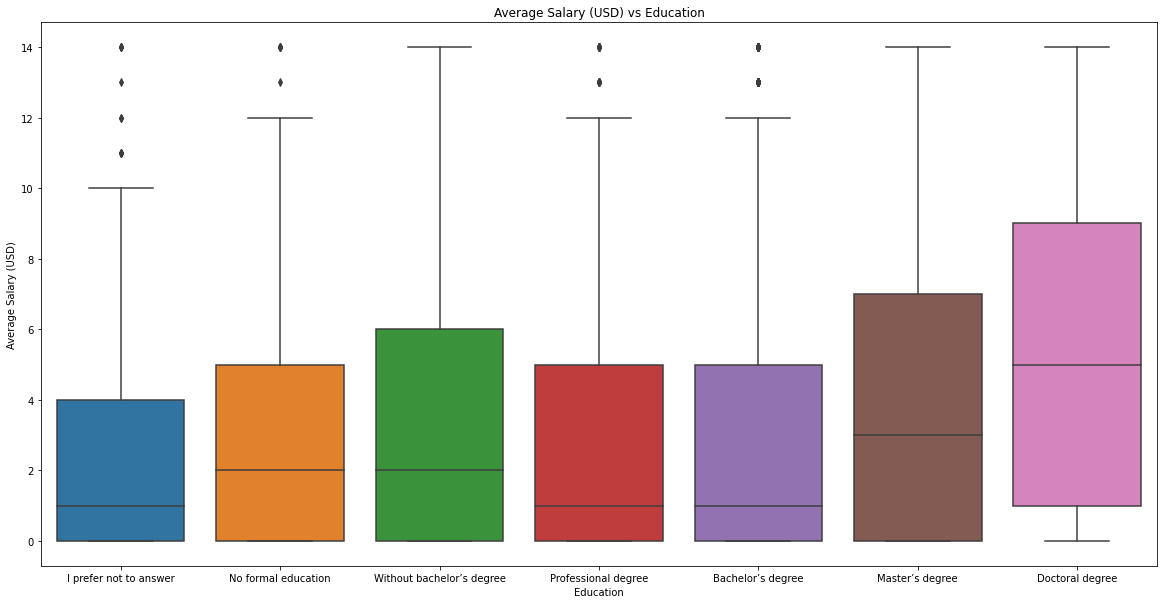

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(df6.Q4, df6.Q10_Encoded)
plt.xticks(plt.xticks()[0], ('I prefer not to answer',
    'No formal education',
    'Without bachelor’s degree',
    'Professional degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree'))
plt.xlabel('Education')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Education')
plt.show()

**From above box plot, it can be noticed that the median of average salary is increasing with the level of education. Among these seven educational options, Doctoral degree has the highest upper quartile and median, Master degree is the second-highest and Bachelor degree has the lowest median. Furthermore, with the increasing of the level of degree the box is more stretched, which means the gap between the upper quartile and the lower quartile becomes wider.**

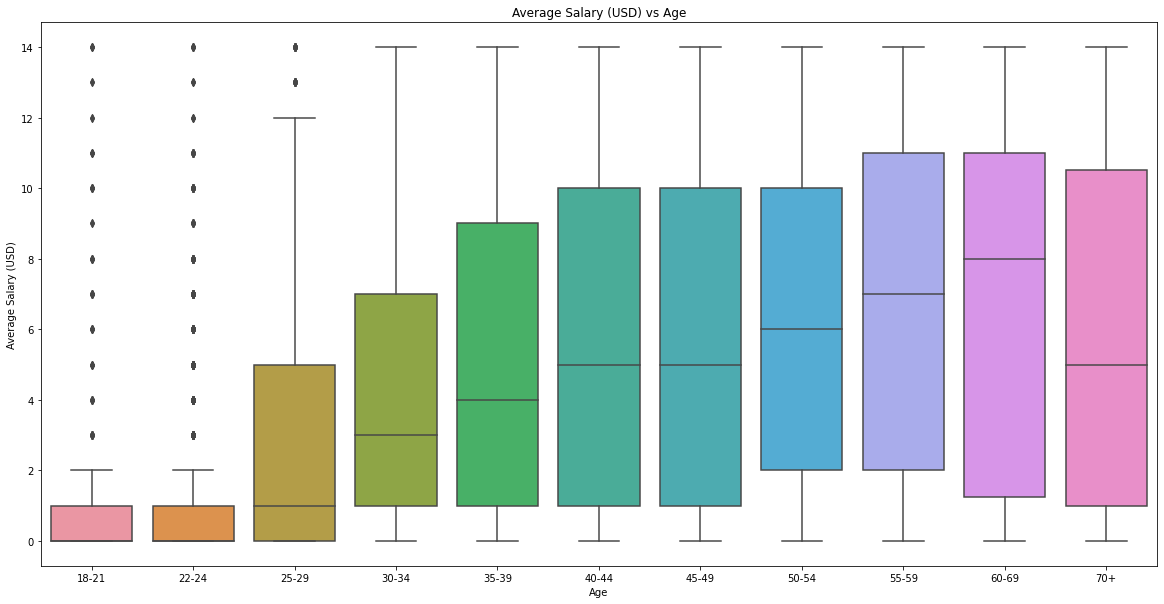

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(df6.Q1, df6.Q10_Encoded)
plt.xticks(plt.xticks()[0], ('18-21', '22-24', '25-29', '30-34', '35-39', 
                             '40-44', '45-49', '50-54', '55-59', '60-69','70+'))
plt.xlabel('Age')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Age')
plt.show()

**The salary increases with age increasing, 60-69 age group is a peak that has the largest upper quartile and largest median. 55-59 age group is the second highest median, 70+ has the third highest median. This phenomenon may because with the age grows, the people will have more working experience and work in a big company. Compare with the young people, most of them are working in a relatively small company, so that they earn less.**

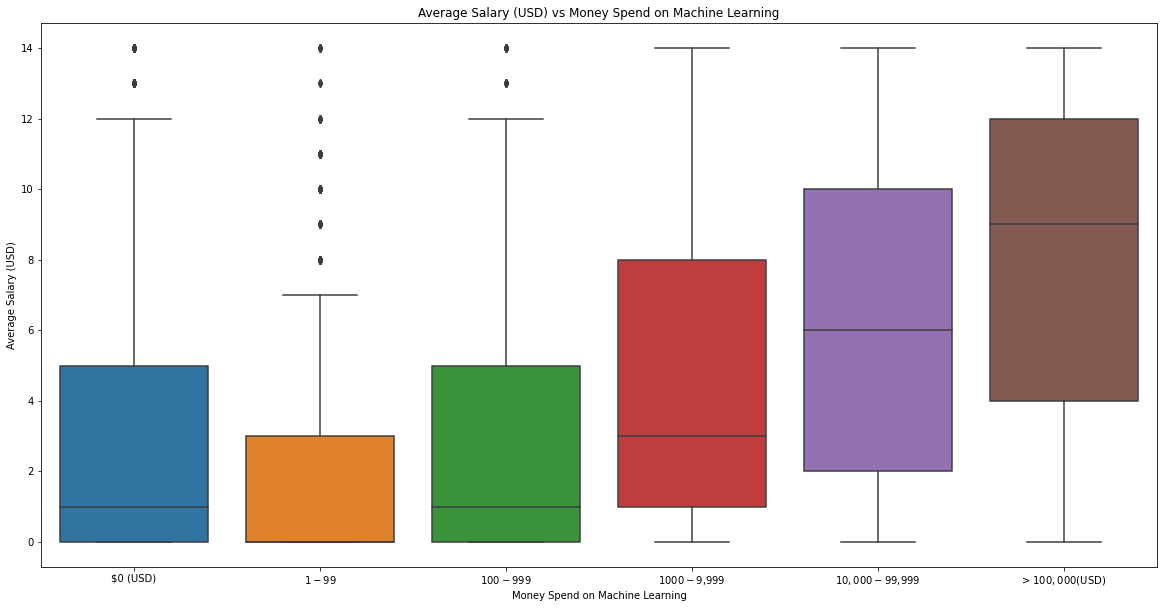

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(df6.Q11, df6.Q10_Encoded)
plt.xticks(plt.xticks()[0], ('$0 (USD)', '$1-$99', '$100-$999', '$1000-$9,999', 
                               '$10,000-$99,999', '> $100,000 ($USD)'))
plt.xlabel('Money Spend on Machine Learning')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Money Spend on Machine Learning')
plt.show()

**The boxplot indicates that most people spend more money on machine learning will earn more. This may because when a person earn more money, he/she will choose to spend more on machine learning, like buy a expensive computer, or dataset, etc.**

### 2.2 Correlation Plot

In [31]:
# Plot the correlation plot for Q10_Encoded
corr_list = []
col_name_list = []
df7 = df6.drop(df6[['Q10', 'Q10_buckets']], axis=1)

for col in df7.columns:
    corr = df7['Q10_Encoded'].corr(df7[col])
    corr_list.append(corr)
    col_name_list.append(col)
d = {'Column Names': col_name_list, 'Correlation': corr_list}
df_cor = pd.DataFrame(d, columns=['Column Names', 'Correlation'])
df_sort = df_cor.sort_values(by=['Correlation'], ascending=False)[0:16]
ten_corr = df7[df_sort['Column Names']].corr()

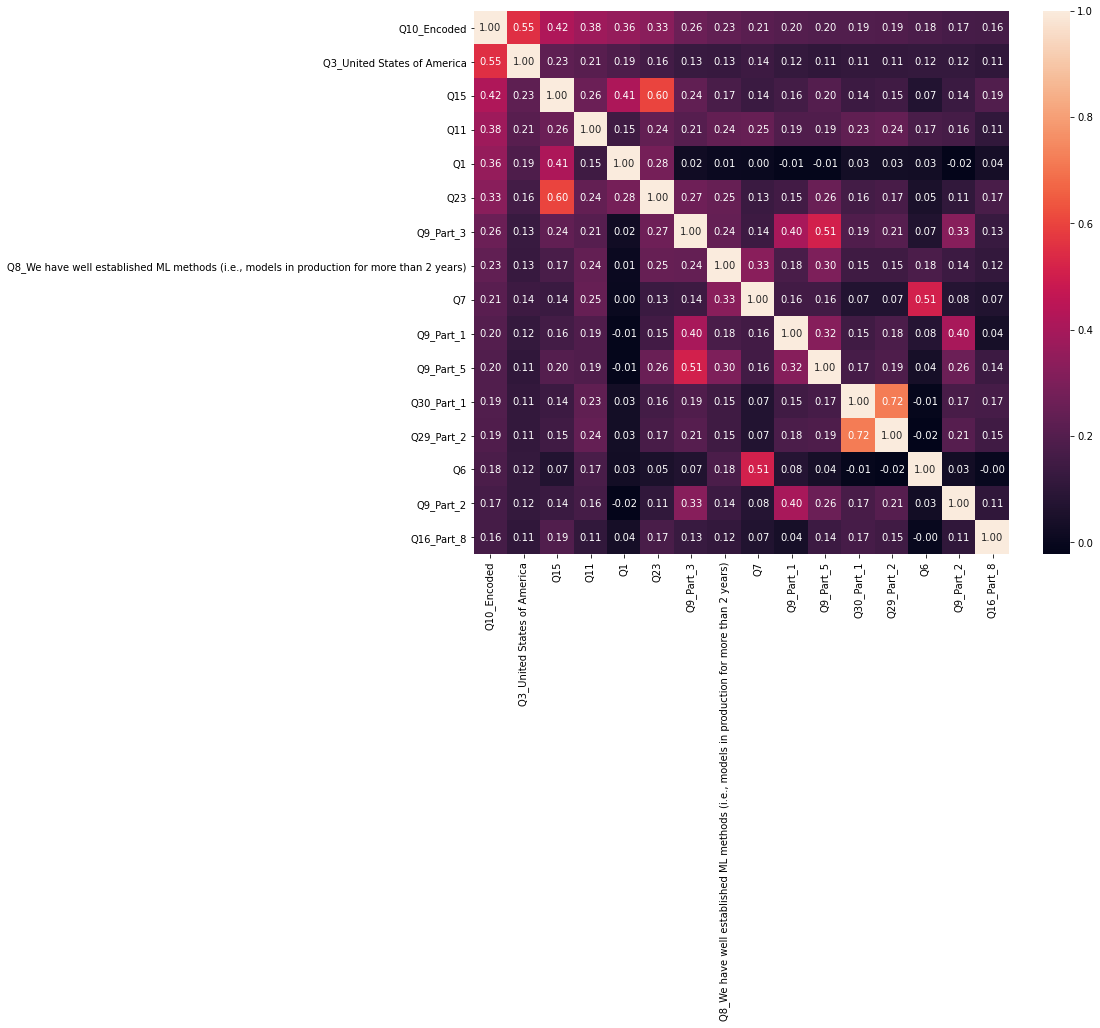

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(ten_corr, annot=True,  fmt=".2f", 
            yticklabels=df_sort['Column Names'], xticklabels=df_sort['Column Names'])

**From above correlation plot, highest correlation is 0.55, which means there is strongest relationship between survey respondent’s reside in US and yearly compensation.**

### 2.2 Select the features

**Explain how feature engineering is a useful tool in machine learning**

**Feature engineering is the process of extract features from raw data. Most of dataset usually contain lots of features, this will significantly increase the training time of the machine learning model, it can make your model very complicated which in turn may lead to overfitting. After feature sewlection, if the process is done correctly, it increases the predictive power of machine learning algorithms by extracting features from raw data that help facilitate the machine learning process and improve the performance of machine learning algorithms.**

In [33]:
X_feature = df7.drop(['Q10_Encoded'], axis=1)
y_feature = df7['Q10_Encoded']
# # Split data into 70% train and 30% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [34]:
scaler = StandardScaler()
scaler.fit(X_feature)
X_feature_std = scaler.transform(X_feature) 
# X_test_std = scaler.transform(X_test)
X_feature_std = pd.DataFrame(X_feature_std, columns=X_feature.columns)

,Q1,Q4,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q2_Female,Q2_Male,Q2_Prefer not to say,Q2_Prefer to self-describe,Q3_Algeria,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Saudi Arabia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q8_I do not know,Q8_No (we do not use ML methods),Q8_We are exploring ML methods (and may one day put a model into production),"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)",Q8_We use ML methods for generating insights (but do not put working models into production),"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local de

In [55]:
# Apply Lasso to select features
lasso_selector = SelectFromModel(LogisticRegression(C=0.003, penalty='l1', solver='saga'))
lasso_selector.fit(X_feature_std, y_feature)
lasso_support = lasso_selector.get_support()
lasso_feature = X_feature_std.columns[(lasso_support)]
print('Selected', len(lasso_feature), 'features')
print('Selected features name:', lasso_feature)

Selected 29 features
Selected features name: Index(['Q1', 'Q4', 'Q6', 'Q7', 'Q9_Part_1', 'Q9_Part_3', 'Q11', 'Q12_Part_8',
       'Q13_Part_2', 'Q15', 'Q17_Part_11', 'Q18_Part_9', 'Q24_Part_3',
       'Q25_Part_7', 'Q29_Part_2', 'Q2_Female', 'Q3_Argentina', 'Q3_Canada',
       'Q3_Germany', 'Q3_India', 'Q3_Indonesia', 'Q3_Nigeria', 'Q3_Pakistan',
       'Q3_Spain', 'Q3_United Kingdom of Great Britain and Northern Ireland',
       'Q3_United States of America', 'Q3_Viet Nam', 'Q8_I do not know',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)'],
      dtype='object')


**Coefficient in SelectFromModel: C: inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Solver='saga' used for L1 penalty and suitable for large dataset.**

**I used Lasso for feature selection, it is one of regularized regression method, which consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.**

**Combine with the correlation, the features that I selected are: Q1, Q7, Q9_Part_1, Q11, Q15, Q9_Part_3, Q3_United States of America, Q8_We have well established ML methods, Q6, Q23.**

In [36]:
df8 = df7[['Q1', 'Q7', 'Q9_Part_1', 'Q11', 'Q15', 'Q9_Part_3', 
           'Q3_United States of America', 
           'Q6', 'Q23',
          'Q8_We have well established ML methods (i.e., models in production for more than 2 years)']]
df8

,Q1,Q7,Q9_Part_1,Q11,Q15,Q9_Part_3,Q3_United States of America,Q6,Q23,"Q8_We have well established ML methods (i.e., models in production for more than 2 years)"
1,23.0,0,0,0,1.5,0,0,5000,1.5,0
2,42.0,20,1,100000,0.0,1,0,10000,1.0,1
3,42.0,20,0,55000,1.5,0,0,10000,2.5,0
4,23.0,0,0,0,1.0,0,0,25,1.0,0
5,52.0,3,0,55000,20.0,1,0,25,12.5,1
...,...,...,...,...,...,...,...,...,...,...
12493,23.0,3,1,550,4.0,0,0,150,1.0,0
12494,27.0,1,1,0,4.0,0,0,625,1.0,0
12495,19.5,3,0,0,1.5,0,0,625,1.0,0
12496,27.0,17,0,0,4.0,0,0,150,1.0,0


## 3 Model implementation

In [37]:
warnings.filterwarnings("ignore")

In [38]:
# Split data into 70% train and 30% test
# random_state=42 means each time the data divide into same subset
X = df8
y = df7['Q10_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_model = np.array(X_train)
scaler = StandardScaler()
scaler.fit(X_model)
X_model_std = scaler.transform(X_model)
X_test_std = scaler.transform(X_test)
y_model = np.array(y_train)

In [86]:
def logisticCV (X, y, model): 
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)
    accuracy = np.zeros(10)
    mse_train = np.zeros(10)
    mse_test = np.zeros(10)
    variance = np.zeros(10)
    np_idx = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train ,y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        
        Mse_train = mean_squared_error(y_train, predictions_train)
        Mse_test = mean_squared_error(y_test,  predictions_test)
        
        Variance = np.var( predictions_test)
        ACC = accuracy_score(y_test,predictions_test)*100
        
        accuracy[np_idx] = ACC
        mse_train[np_idx] = Mse_train
        mse_test[np_idx] = Mse_test
        variance[np_idx] = Variance
        np_idx += 1
#         print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   
    proba = model.predict_proba(X_test)
    avg_accuracy = np.mean(accuracy)  
    var_accuracy = np.var(accuracy)
    avg_mse_train = np.mean(mse_train)
    avg_mse_test = np.mean(mse_test)
    avg_variance = np.mean(variance)
    avg_bias = avg_mse_test - avg_variance
#     print ("Average of accuracy score: {}% and standard derivative: {}%".format(round(avg_accuracy, 3), 
#                                                                           round(np.std(accuracy), 3)))
    return avg_accuracy, var_accuracy, avg_bias, avg_variance, avg_mse_train, avg_mse_test, proba

In [87]:
# Logistic regession for l1 penalty and changing c from 0.0001 to 100
avg_accuracy_list_l1 = []
var_accuracy_list_l1 = []
avg_bias_list_l1 = []
avg_variance_list_l1 = []
avg_mse_train_list_l1 = []
avg_mse_test_list_l1 = []

for c in  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    model_l1 = LogisticRegression(C=c, penalty='l1', solver='saga')
    avg_accuracy_l1, var_accuracy_l1, avg_bias_l1, avg_variance_l1, avg_mse_train_l1, avg_mse_test_l1, proba_l1 = logisticCV(X_model_std, y_model, model_l1)
    
    avg_accuracy_list_l1.append(avg_accuracy_l1)
    var_accuracy_list_l1.append(var_accuracy_l1)
    avg_bias_list_l1.append(avg_bias_l1)
    avg_variance_list_l1.append(avg_variance_l1)
    avg_mse_train_list_l1.append(avg_mse_train_l1)
    avg_mse_test_list_l1.append(avg_mse_test_l1)
    
d_l1 = {'Average accuracy(%)': avg_accuracy_list_l1, 
        'Accuracy variance(%)':  var_accuracy_list_l1,
        'Bias':  avg_bias_list_l1,
        'Variance': avg_variance_list_l1,
        'Train Error':  avg_mse_train_list_l1,
        'Test Error': avg_mse_test_list_l1}

df_accuracy_l1 = pd.DataFrame(d_l1, columns=['Average accuracy(%)', 'Accuracy variance(%)', 
                                             'Bias', 'Variance', 'Train Error', 'Test Error'],
                              index = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
df_accuracy_l1
# plot_learning_curve(model,'Logistic Regression', df8, df7['Q10_Encoded'], cv=10)

,Average accuracy(%),Accuracy variance(%),Bias,Variance,Train Error,Test Error
0.0001,31.382581,9.683247,33.381690,0.000000,33.381903,33.381690
0.0010,31.382581,9.683247,33.381690,0.000000,33.381903,33.381690
0.0100,31.382581,9.683247,33.381690,0.000000,33.377099,33.381690
0.1000,33.706452,6.289342,3.575870,14.974788,17.802939,18.550658
1.0000,33.226452,4.881136,-1.102298,17.239427,15.527872,16.137129
10.0000,33.307097,6.449550,-1.963184,17.653171,15.290511,15.689987
100.0000,33.307097,6.449550,-2.024150,17.696537,15.248251,15.672387


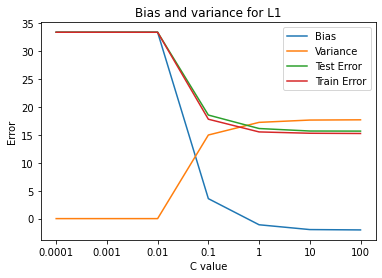

In [115]:
plt.plot(np.arange(7), avg_bias_list_l1, label='Bias')
plt.plot(np.arange(7), avg_variance_list_l1, label='Variance')
plt.plot(np.arange(7), avg_mse_test_list_l1, label='Test Error')
plt.plot(np.arange(7), avg_mse_train_list_l1, label='Train Error')
plt.xlabel("C value")
plt.ylabel("Error")
plt.title("Bias and variance for L1")
plt.xticks(np.arange(7), [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
plt.legend()
plt.show()

In [90]:
# Output of the probability belong to each salary buckets for l1 c=100
df_prob_l1 = pd.DataFrame(pd.DataFrame(proba_l1).mean(), columns=['Probability'], 
                       index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
df_prob_new_l1 = df_prob_l1.rename(index={ 0: '0-9,999', 1: '10,000-19,999', 2: '20,000-29,999', 3: '30,000-39,999',
                                   4: '40,000-49,999', 5: '50,000-59,999', 6: '60,000-69,999', 7: '70,000-79,999',
                                   8: '80,000-89,999', 9: '90,000-99,999', 10: '100,000-124,999', 
                                   11: '125,000-149,999', 12: '150,000-199,999', 13: '200,000-249,999',
                                   14: '>250,000'})
df_prob_new_l1

,Probability
"0-9,999",0.304113
"10,000-19,999",0.104458
"20,000-29,999",0.091846
"30,000-39,999",0.064074
"40,000-49,999",0.053947
"50,000-59,999",0.040491
"60,000-69,999",0.038310
"70,000-79,999",0.059859
"80,000-89,999",0.029452
"90,000-99,999",0.029595


In [97]:
# Logistic regession for l2 penalty and changing c from 0.0001 to 100
avg_accuracy_list_l2 = []
var_accuracy_list_l2 = []
avg_bias_list_l2 = []
avg_variance_list_l2 = []
avg_mse_train_list_l2 = []
avg_mse_test_list_l2 = []

for c in  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    model_l2 = LogisticRegression(C=c, penalty='l2', solver='lbfgs')
    avg_accuracy_l2, var_accuracy_l2, avg_bias_l2, avg_variance_l2, avg_mse_train_l2, avg_mse_test_l2, proba_l2 = logisticCV(X_model_std, y_model, model_l2)
    
    avg_accuracy_list_l2.append(avg_accuracy_l2)
    var_accuracy_list_l2.append(var_accuracy_l2)
    avg_bias_list_l2.append(avg_bias_l2)
    avg_variance_list_l2.append(avg_variance_l2)
    avg_mse_train_list_l2.append(avg_mse_train_l2)
    avg_mse_test_list_l2.append(avg_mse_test_l2)
    
d_l2 = {'Average accuracy(%)': avg_accuracy_list_l2, 
        'Accuracy variance(%)':  var_accuracy_list_l2,
        'Bias':  avg_bias_list_l2,
        'Variance': avg_variance_list_l2,
        'Train Error':  avg_mse_train_list_l2,
        'Test Error': avg_mse_test_list_l2}

df_accuracy_l2 = pd.DataFrame(d_l2, columns=['Average accuracy(%)', 'Accuracy variance(%)', 
                                             'Bias', 'Variance', 'Train Error', 'Test Error'],
                              index = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
df_accuracy_l2
# plot_learning_curve(model,'Logistic Regression', df8, df7['Q10_Encoded'], cv=10)

,Average accuracy(%),Accuracy variance(%),Bias,Variance,Train Error,Test Error
0.0001,31.382581,9.683247,33.381690,0.000000,33.381903,33.381690
0.0010,31.703226,7.960674,31.647224,0.868402,32.481618,32.515626
0.0100,33.385161,6.047401,9.236274,12.525081,21.363305,21.761355
0.1000,33.386452,7.407071,0.109894,16.473506,16.277453,16.583400
1.0000,33.307097,5.553550,-1.729437,17.585024,15.390429,15.855587
10.0000,33.307097,6.449550,-2.024150,17.696537,15.257859,15.672387
100.0000,33.307097,6.449550,-2.024150,17.696537,15.254034,15.672387


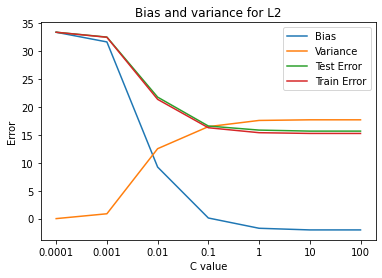

In [114]:
plt.plot(np.arange(7), avg_bias_list_l2, label='Bias')
plt.plot(np.arange(7), avg_variance_list_l2, label='Variance')
plt.plot(np.arange(7), avg_mse_test_list_l2, label='Test Error')
plt.plot(np.arange(7), avg_mse_train_list_l2, label='Train Error')
plt.xlabel("C value")
plt.ylabel("Error")
plt.title("Bias and variance for L2")
plt.xticks(np.arange(7), [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
plt.legend()
plt.show()

In [44]:
# Output of the probability belong to each salary buckets for l2 c=100
df_prob_l2 = pd.DataFrame(pd.DataFrame(proba_l2).mean(), columns=['Probability'], 
                       index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
df_prob_new_l2 = df_prob_l2.rename(index={ 0: '0-9,999', 1: '10,000-19,999', 2: '20,000-29,999', 3: '30,000-39,999',
                                   4: '40,000-49,999', 5: '50,000-59,999', 6: '60,000-69,999', 7: '70,000-79,999',
                                   8: '80,000-89,999', 9: '90,000-99,999', 10: '100,000-124,999', 
                                   11: '125,000-149,999', 12: '150,000-199,999', 13: '200,000-249,999',
                                   14: '>250,000'})
df_prob_new_l2

,Probability
"0-9,999",0.316285
"10,000-19,999",0.107510
"20,000-29,999",0.083924
"30,000-39,999",0.057168
"40,000-49,999",0.058307
"50,000-59,999",0.058089
"60,000-69,999",0.048683
"70,000-79,999",0.041636
"80,000-89,999",0.034727
"90,000-99,999",0.030151


**For l1 model, when C value is 1, accuracy reach to a peak value, which is 35.521% and variance is 1.672%. For l2 model, the highest accuracy is 35.555% when C is 0.1, accuracy variance is 1.276%**

**From the output of the algorithm that shows approximately 30% probability that the prediction result will fall into the 0-9999 USD salary bucket.**

**Bias is the difference between the average prediction of the model and the real test value. Model with high bias always oversimplified, it will cause underfitting and high error on both training and test data.**

**Variance is the variability of model prediction for original data points or the separation of the data. Model with high variance does not generalize on the new data point, overfitting on training data. As a result, such models perform very well on training data but has high error rates on test data.**

**Tradeoff in complexity means there is a tradeoff between bias and variance, the algorithm can not be more complex and less complex at the same time. The optimal model complexity is occur at the intersection of bias and variance. From the bias and variance trade off graphs for l1 and l2, the intersection for bias and variance for l1 and l2 are approximately 0.09 and 0.009, at these times, l1 will result a samller test error, so I choose the model with hyperparameter C=0.09 penalty=l1 solver=saga.**

## 4 Model tuning

### 4.1 Grid Search

In [81]:
# Apply the standralized training data to do the grid search
# Split the train data into train and test for grid search
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_model_std, y_model, test_size=0.3, random_state=42)
parameters = {'C': np.arange(0.001,1,0.05), 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'max_iter': [100, 1000, 10000]
             }
grid_obj = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
grid_obj = grid_obj.fit(X_train_grid, y_train_grid)
reg_gridsearch = grid_obj.best_estimator_ 
reg_gridsearch.fit(X_train_grid, y_train_grid)
reg_gridsearch.score(X_train_grid, y_train_grid)
print('The score get from grid search is', reg_gridsearch.score(X_train_grid, y_train_grid))

The score get from grid search is 0.36155606407322655


In [82]:
# Get the best model hyperparameters resulted from grid search
print('Hyperparameter C is', grid_obj.best_estimator_.C)
print('Hyperparameter solver is', grid_obj.best_estimator_.solver)
print('Hyperparameter penalty is', grid_obj.best_estimator_.penalty)
print('Hyperparameter max_iter is', grid_obj.best_estimator_.max_iter)

Hyperparameter C is 0.35100000000000003
Hyperparameter solver is saga
Hyperparameter penalty is l1
Hyperparameter max_iter is 100


**I choose C, solver, penalty and max_iter as metrics. The best score that get from grid search is 0.362, the hyperparameters are C=0.35, solver=saga, penalty=l1, max_iter=100**

### 4.2 Performance Measures

In [103]:
model_P3 = LogisticRegression(C=0.09, penalty='l1', solver='saga')
model_P3.fit(X_model_std, y_model)
prediction_P3 = model_P3.predict(X_test_std)
col_name = ['0-9,999', '10,000-19,999', '20,000-29,999','30,000-39,999','40,000-49,999',
                    '50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999',
                    '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','>250,000']
print ('\n clasification report:\n', classification_report(y_test, prediction_P3, target_names=col_name))


 clasification report:
                  precision    recall  f1-score   support

        0-9,999       0.41      0.94      0.57      3648
  10,000-19,999       0.09      0.04      0.05      1227
  20,000-29,999       0.05      0.01      0.01       895
  30,000-39,999       0.00      0.00      0.00       647
  40,000-49,999       0.06      0.00      0.00       651
  50,000-59,999       0.00      0.00      0.00       648
  60,000-69,999       0.00      0.00      0.00       530
  70,000-79,999       0.00      0.00      0.00       452
  80,000-89,999       0.00      0.00      0.00       368
  90,000-99,999       0.00      0.00      0.00       341
100,000-124,999       0.18      0.50      0.26       665
125,000-149,999       0.09      0.07      0.08       433
150,000-199,999       0.11      0.01      0.01       400
200,000-249,999       0.00      0.00      0.00       141
       >250,000       0.00      0.00      0.00       202

       accuracy                           0.34     11248
    

In [104]:
# Evaluate the model get from grid search
model_grid = LogisticRegression(C=0.35, penalty='l1', solver='saga', max_iter=100)
model_grid.fit(X_train_grid, y_train_grid)
prediction_grid = model_grid.predict(X_test_grid)
col_name = ['0-9,999', '10,000-19,999', '20,000-29,999','30,000-39,999','40,000-49,999',
                    '50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999',
                    '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','>250,000']
print ('\n clasification report:\n', classification_report(y_test_grid, prediction_grid, target_names=col_name))


 clasification report:
                  precision    recall  f1-score   support

        0-9,999       0.46      0.91      0.61       129
  10,000-19,999       0.06      0.02      0.03        44
  20,000-29,999       0.00      0.00      0.00        29
  30,000-39,999       0.00      0.00      0.00        24
  40,000-49,999       0.00      0.00      0.00        18
  50,000-59,999       0.22      0.11      0.15        18
  60,000-69,999       0.00      0.00      0.00        20
  70,000-79,999       0.25      0.05      0.09        19
  80,000-89,999       0.00      0.00      0.00         9
  90,000-99,999       0.00      0.00      0.00         8
100,000-124,999       0.23      0.48      0.31        23
125,000-149,999       0.09      0.25      0.13         8
150,000-199,999       1.00      0.07      0.12        15
200,000-249,999       0.33      0.17      0.22         6
       >250,000       0.00      0.00      0.00         5

       accuracy                           0.37       375
    

**Comparing the model paramater that select from Question 3 and grid search, grid search model will give a higher accuracy. The best model is LogisticRegression(C=0.35, solver=saga, penalty=l1, max_iter=100)**

## 5 Testing & Discussion

### 5.1 Model Perform on Train and Test Set

In [110]:
# Optimal model perform on training set
model_best = LogisticRegression(C=0.35, penalty='l1', solver='saga', max_iter=100)
model_best.fit(X_model_std, y_train)
prediction_best = model_best.predict(X_model_std)
print ('Accuracy in training set:', accuracy_score(y_train, prediction_best))
print ('\n clasification report:\n', classification_report(y_train, prediction_best))

Accuracy in training set: 0.3506805444355484

 clasification report:
               precision    recall  f1-score   support

         0.0       0.41      0.94      0.57       392
         1.0       0.14      0.04      0.07       135
         2.0       0.18      0.02      0.03       113
         3.0       0.00      0.00      0.00        81
         4.0       0.20      0.01      0.03        68
         5.0       0.27      0.12      0.17        56
         6.0       0.00      0.00      0.00        46
         7.0       0.18      0.08      0.11        72
         8.0       0.33      0.03      0.05        37
         9.0       0.00      0.00      0.00        36
        10.0       0.22      0.49      0.30        85
        11.0       0.16      0.06      0.09        50
        12.0       0.13      0.06      0.08        34
        13.0       0.00      0.00      0.00        24
        14.0       0.00      0.00      0.00        20

    accuracy                           0.35      1249
   macro a

In [111]:
# Optimal model perform on testing set
model_best = LogisticRegression(C=0.35, penalty='l1', solver='saga', max_iter=100)
model_best.fit(X_model_std, y_train)
prediction_best = model_best.predict(X_test_std)
print ('Accuracy on test set:', accuracy_score(y_test, prediction_best))
print ('\n clasification report:\n', classification_report(y_test, prediction_best))

Accuracy on test set: 0.34503911806543386

 clasification report:
               precision    recall  f1-score   support

         0.0       0.42      0.93      0.58      3648
         1.0       0.12      0.04      0.06      1227
         2.0       0.06      0.00      0.01       895
         3.0       0.03      0.00      0.00       647
         4.0       0.08      0.00      0.01       651
         5.0       0.12      0.03      0.05       648
         6.0       0.00      0.00      0.00       530
         7.0       0.11      0.08      0.09       452
         8.0       0.04      0.00      0.01       368
         9.0       0.00      0.00      0.00       341
        10.0       0.18      0.46      0.25       665
        11.0       0.11      0.06      0.08       433
        12.0       0.24      0.13      0.17       400
        13.0       0.00      0.00      0.00       141
        14.0       0.00      0.00      0.00       202

    accuracy                           0.35     11248
   macro avg 

**Using the best model that I selected, the accuracy on training set is 0.351 and on test set is 0.345.**

### 5.2 Plot Distribution

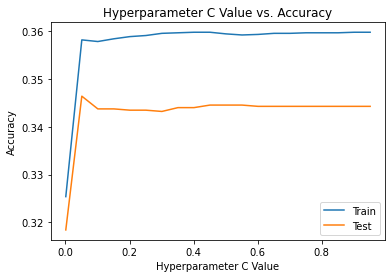

In [49]:
accuracy_train_list = []
accuracy_test_list = []
for c in range (1, 1000, 50):
    model_best = LogisticRegression(C=c/1000, penalty='l1', solver='saga', max_iter=100)
    model_best.fit(X_model_std, y_train)
    
    prediction_best_train = model_best.predict(X_model_std)
    prediction_best_test = model_best.predict(X_test_std)
    
    accuracy_train = accuracy_score(y_train, prediction_best_train)
    accuracy_test = accuracy_score(y_test, prediction_best_test)
    
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.plot(np.arange(0.001,1,0.05), accuracy_train_list, label='Train')
plt.plot(np.arange(0.001,1,0.05), accuracy_test_list, label='Test')
plt.xlabel("Hyperparameter C Value")
plt.ylabel("Accuracy")
plt.title("Hyperparameter C Value vs. Accuracy")
plt.legend()
plt.show()

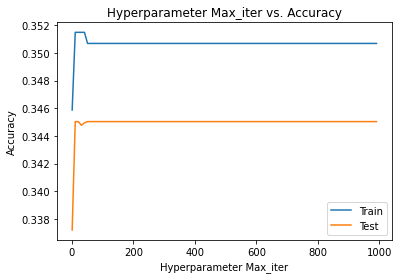

In [113]:
accuracy_train_list = []
accuracy_test_list = []
for i in range (1, 1000, 10):
    model_best = LogisticRegression(C=0.35, penalty='l1', solver='saga', max_iter=i)
    model_best.fit(X_model_std, y_train)
    
    prediction_best_train = model_best.predict(X_model_std)
    prediction_best_test = model_best.predict(X_test_std)
    
    accuracy_train = accuracy_score(y_train, prediction_best_train)
    accuracy_test = accuracy_score(y_test, prediction_best_test)
    
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.plot(np.arange(1, 1000, 10), accuracy_train_list, label='Train')
plt.plot(np.arange(1, 1000, 10), accuracy_test_list, label='Test')
plt.xlabel("Hyperparameter Max_iter")
plt.ylabel("Accuracy")
plt.title("Hyperparameter Max_iter vs. Accuracy")
plt.legend()
plt.show()

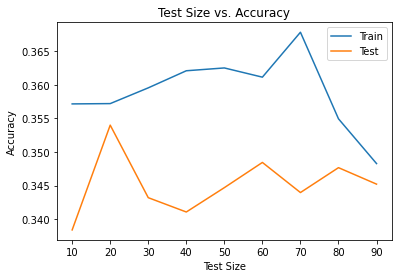

In [112]:
accuracy_train_list = []
accuracy_test_list = []
for s in range(10, 100, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s/100, random_state=42)
    X_model = np.array(X_train)
    scaler = StandardScaler()
    scaler.fit(X_model)
    X_model_std = scaler.transform(X_model)
    X_test_std = scaler.transform(X_test)
    y_model = np.array(y_train)
    
    model_best = LogisticRegression(C=0.35, penalty='l1', solver='saga', max_iter=100)
    model_best.fit(X_model_std, y_train)
    
    prediction_best_train = model_best.predict(X_model_std)
    prediction_best_test = model_best.predict(X_test_std)
    
    accuracy_train = accuracy_score(y_train, prediction_best_train)
    accuracy_test = accuracy_score(y_test, prediction_best_test)
    
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    
plt.plot(np.arange(10, 100, 10), accuracy_train_list, label='Train')
plt.plot(np.arange(10, 100, 10), accuracy_test_list, label='Test')
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.title("Test Size vs. Accuracy")
plt.legend()
plt.show()

**The first plot is keeping the max_iter as 100, tuning C value and the second plot is keeping C as 0.35 changing max_iter. Both of the plot shows the train and test accuraies are not improved, both of them are below 40%.**

**Through verifying the test set size, when the training set size is 80%, the test accuracy can be increasing to 0.354, and the corresponding train accuracy is 0.357. When the tarining set size is 30%, the training accuracy is 0.368, and the test accuracy is 0.344. For training size=80%, 40%, 20%, both train and test accuracy will increasing a little bit. Overall the accuracy tend shows not improved.**

### 5.3 Discussion

**One important reason for the low train and test accuracy is beacuse our model is underfitting. It is because the model or the algorithm does not fit the data well enough, it usually happens when we have less data to build an accurate model. If more features added into training and test process, the accuracy will improved.**

**Another resaon is the logistic regression can not fit to our multi-class classification dataset. Since logistic regression is a form of binary regression, it not work will to classify more than two classes.**

**It also may because the unbalance dataset, most panticipants earn the salary is between 0 to 20,000 USD, so that the model will predict more in that range, it will also cause the low accuracy.**